In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from funcs.ffd import fit_beta_to_powerlaw, plot_powerlaw

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

In [52]:
df = pd.read_csv("../flare_tables/20200225_vetted_flares.csv",
                names=['ampl_rec','cstart','cstop','ed_rec','ed_rec_err',
                    'istart', 'istop','total_n_valid_data_points', 
                    'tstart', 'tstop',  'dur', 'ed_ratio','ed_ratio_count',
            'amplitude_ratio','amplitude_ratio_count','duration_ratio','duration_ratio_count',
            'amplitude_corr','duration_corr','ed_corr','recovery_probability','recovery_probability_count',
            'ed_ratio_std','amplitude_ratio_std','duration_ratio_std','recovery_probability_std',
            'ed_corr_err','amplitude_corr_err','duration_corr_err',"TIC","sector"])
              
spts = pd.read_csv("../flare_tables/spts.csv")

spts.head()
df = df.merge(spts[["TIC","spt","TESSmag"]],on="TIC")
df.head()

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop,...,amplitude_ratio_std,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,TIC,sector,spt,TESSmag
0,0.205888,134304,134309,67.120761,3.173210,2025,2030,14656,1413.993959,1414.000903,...,0.216691,0.861911,0.480091,19.234675,0.076164,0.004110,141306513,4,M7,14.114
1,0.046567,137530,137534,15.629983,1.373603,5211,5215,14656,1418.474567,1418.480123,...,0.106518,0.179538,0.233295,18.366493,0.006369,0.078722,141306513,4,M7,14.114
2,0.432789,142823,142831,158.509751,2.815147,7029,7037,14656,1425.825985,1425.837096,...,1.313973,0.560077,0.398147,73.540852,0.715953,0.001228,141306513,4,M7,14.114
3,0.184068,146868,146872,54.249658,2.487500,11047,11051,14656,1431.444002,1431.449558,...,0.216691,0.861911,0.427976,15.533675,0.068093,0.003288,141306513,4,M7,14.114
4,0.149158,289806,289811,52.999981,2.495028,3262,3267,18704,1629.964562,1629.971506,...,0.124189,0.329367,0.492076,27.150836,0.021153,0.013543,358108509,12,M6,14.351


In [76]:
totobs = df.groupby(["TIC","sector"]).total_n_valid_data_points.apply(lambda x: x.iloc[0]).sum()/30./24./365.25

In [77]:
totobs

6.161734732679292

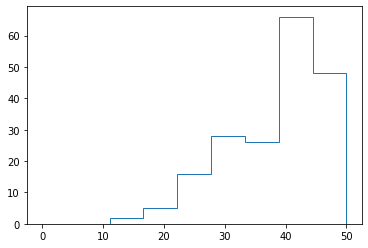

In [88]:
plt.hist(df.recovery_probability_count, bins=np.linspace(0,50,10), histtype="step");

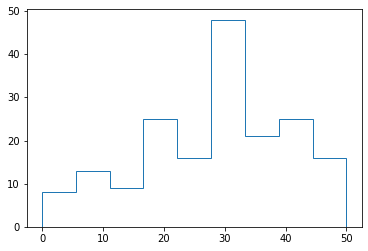

In [89]:
plt.hist(df.ed_ratio_count, bins=np.linspace(0,50,10), histtype="step");

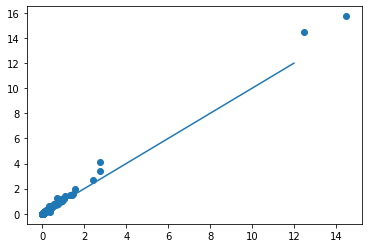

In [56]:
plt.scatter(df.ampl_rec, df.amplitude_corr)
plt.plot([0,12],[0,12])

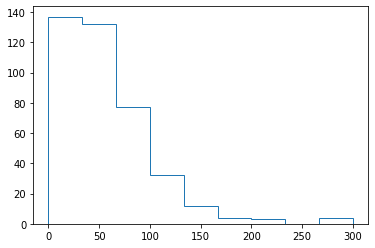

In [57]:
plt.hist(df.amplitude_ratio_count, bins=np.linspace(0,300,10), histtype="step");

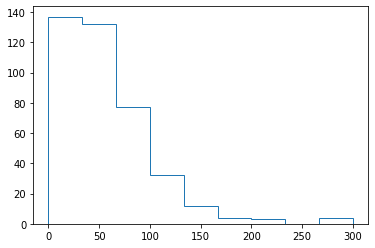

In [58]:
plt.hist(df.duration_ratio_count, bins=np.linspace(0,300,10), histtype="step");

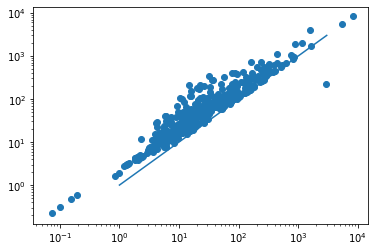

In [59]:
plt.scatter(df.ed_rec, df.ed_corr)
plt.plot([1,3e3],[1,3e3])
plt.yscale("log")
plt.xscale("log")

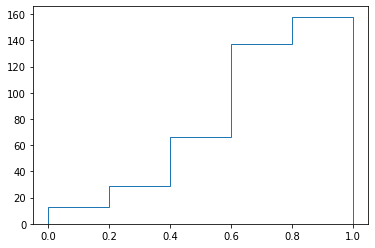

In [60]:
plt.hist(df.recovery_probability, bins=np.linspace(0,1,6), histtype="step");

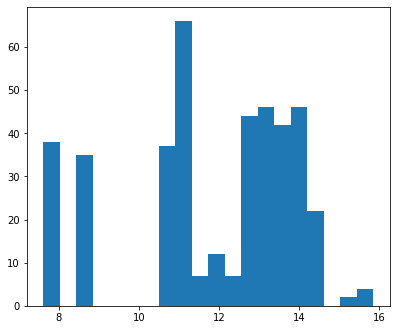

In [61]:
#correct for magnitudes
plt.figure(figsize=(6.5,5.5))
plt.hist(df.TESSmag, bins=20);


In [62]:
df = df[~np.isnan(df.recovery_probability)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr)]
df["encorrprob"] = 1./df.recovery_probability.values

/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


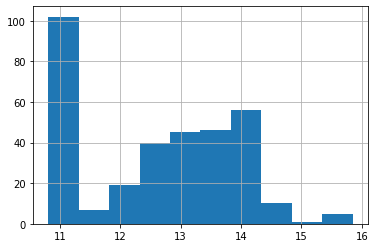

In [63]:
df[df.TESSmag>10].TESSmag.hist()

In [64]:
#df = df[df.TESSmag>10]

In [65]:
df[df.ed_rec>1e3].T

,143,343,338,299,18,367
ampl_rec,14.5031,12.4642,0.762096,0.234379,2.42536,0.380735
cstart,261209,162283,287775,182725,81083,163838
cstop,261270,162332,287814,182797,81126,163935
ed_rec,8158.73,5505.37,1552.75,1162.49,1622.64,2962.93
ed_rec_err,3.83182,2.70926,35.0085,5.46696,4.18317,19.8269
istart,11012,8802,1315,7828,9368,10350
istop,11073,8851,1354,7893,9411,10447
total_n_valid_data_points,14766,16349,18704,13998,17805,16349
tstart,1590.25,1452.85,1627.15,1481.25,1340.07,1455.01
tstop,1590.34,1452.92,1627.2,1481.35,1340.13,1455.15


In [66]:
#df[['ed_rec', 'ed_corr','TIC',"sector", "TESSmag"]].tail(25)

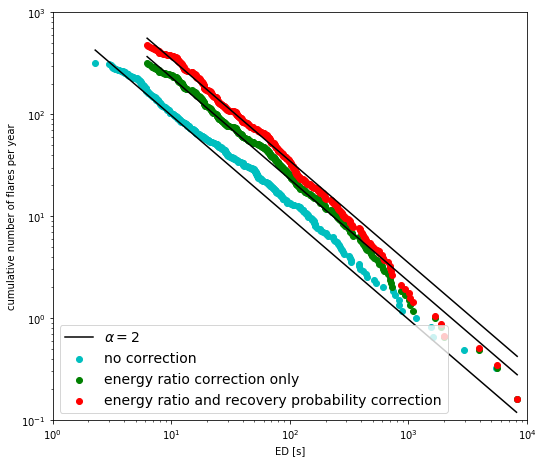

In [87]:
df = df[~np.isnan(df.recovery_probability) & (df.recovery_probability > 0.2)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr) & (df.ed_corr > 6)]
#df["encorrprob"] = 1./df.recovery_probability.values/np.array(freq)
df = df.sort_values(by="ed_corr", ascending=True)
freq = []
for i in range(df.shape[0]):
    f = df.iloc[:i+1]
    freq.append(len(set(f.TIC.values)))

df = df.sort_values(by="ed_corr", ascending=False)

#for spt, df in F.groupby("spt"):
    #print(la)
    #df = df[(df.TESSmag > 11.14) & (df.TESSmag <11.3)]
fig, ax = plt.subplots(1,figsize=(8.5,7.5))
alphaval,alpha_err = 2., .2


a = df.ed_rec.values
f = np.cumsum(1/np.array(freq[::-1]))
f = f/f[0]
plt.scatter(df.ed_rec.sort_values(ascending=False), f/totobs, c="c", label="no correction")
#plt.scatter(df.ed_rec.sort_values(ascending=False), np.cumsum(np.ones_like(freq)), c="c", label="no correction")
_beta, beta, beta_err = fit_beta_to_powerlaw(a,f, alphaval, alpha_err,totobs)
plot_powerlaw(ax, a, alphaval, beta, mode="ED", c="k")


a = df.ed_corr.values
f = np.cumsum(1/np.array(freq[::-1]))
f = f/f[0]
plt.scatter(df.ed_corr.sort_values(ascending=False), f/totobs, c="g", label="energy ratio correction only")
#plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(np.ones_like(freq)), c="g", label="energy ratio correction only")
_beta,beta, beta_err = fit_beta_to_powerlaw(a,f, alphaval, alpha_err,totobs)
plot_powerlaw(ax, a, alphaval, beta, mode="ED", c="k")

f = np.cumsum(1./df.recovery_probability.values/np.array(freq[::-1]))
f = f/f[0]
plt.scatter(df.ed_corr.sort_values(ascending=False), f/totobs, c="r", label="energy ratio and recovery probability correction")
#plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(1./df.recovery_probability.values), c="orange", label="energy ratio and recovery probability correction")
_beta, beta, beta_err = fit_beta_to_powerlaw(a,f, alphaval, alpha_err,totobs)
plot_powerlaw(ax, a, alphaval, beta, mode="ED", c="k", label=r"$\alpha=2$")


plt.xscale('log')
plt.yscale('log')
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares per year")
#plt.title(spt)
plt.legend(fontsize=14)
#     plt.figure(figsize=(6.5,5.5))
#     plt.hist(df.TESSmag)
#     plt.title(spt)

plt.ylim(.1,1e3)
plt.xlim(1,10000)
# for x,z in zip(a,f):
#     print(x,z)
# print(df.shape)
plt.savefig(f"../plots/{tstamp}_FFD_two_step_correction.png".format(tstamp), dpi=300)

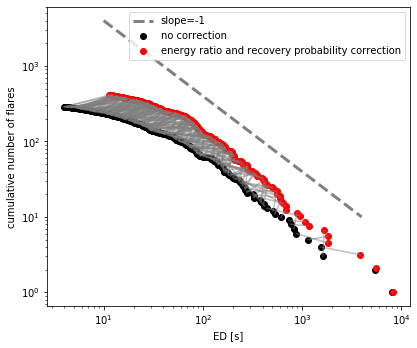

In [19]:
#df = df[df.recovery_probability > .2]


df = df.sort_values(by="ed_rec", ascending=False)
#df['probnocorrcum'] = np.cumsum(1/np.array(freq[::-1])*freq[-1])
df['probnocorrcum'] = np.cumsum(np.ones_like(freq))
df['sortededrec'] =df.ed_rec.sort_values(ascending=False)
df = df.sort_values(by="ed_corr", ascending=False)
df = df[(~df.ed_corr.isnull()) & (np.isfinite(df.ed_corr)) & (df.recovery_probability >0.0) ]
df["ed_corrprob"] = 1/df.recovery_probability.values
df["ed_corrprob_err"] = df.recovery_probability_std / df.recovery_probability**2
df["ed_corrprobcum"] = np.cumsum(df.ed_corrprob.values)


plt.figure(figsize=(6.5,5.5))
for l, row in df.iterrows():
    plt.plot([row.sortededrec, row.ed_corr], [row.probnocorrcum, row.ed_corrprobcum],c="grey",alpha=.5)
plt.scatter(df["sortededrec"], df["probnocorrcum"], label="no correction", c="k")#, condition {}".format(label))
plt.scatter(df.ed_corr, df["ed_corrprobcum"], label="energy ratio and recovery probability correction", c="r")#, condition {}".format(label))
plt.plot([10, 4000],[4000, 10], label="slope=-1", linestyle="dashed", c="grey", linewidth=3)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(.8,250)
#plt.xlim(5,4000)
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.legend()
#plt.savefig("plots/{}_FFD_flare_correspondence_correction.png".format(today), dpi=300)

In [20]:
f


array([2.28338430e-02, 4.70226336e-02, 7.02906074e-02, 1.01738419e-01,
       1.24994233e-01, 1.50573383e-01, 1.74601343e-01, 1.98896776e-01,
       2.40913582e-01, 2.65049264e-01, 2.90878346e-01, 3.23021203e-01,
       3.56122248e-01, 3.81954926e-01, 4.21056745e-01, 4.46792040e-01,
       4.72778882e-01, 5.00939801e-01, 5.27221852e-01, 5.78278190e-01,
       6.03611524e-01, 6.30160196e-01, 6.57911005e-01, 6.86446359e-01,
       7.14833456e-01, 7.45732332e-01, 7.72919832e-01, 7.98323058e-01,
       8.43571927e-01, 8.69212952e-01, 8.99784945e-01, 9.25425970e-01,
       9.51860017e-01, 9.83551172e-01, 1.01035770e+00, 1.03795440e+00,
       1.06975913e+00, 1.10231916e+00, 1.13401032e+00, 1.16370526e+00,
       1.19148304e+00, 1.22267212e+00, 1.25354932e+00, 1.28278908e+00,
       1.31531421e+00, 1.35102850e+00, 1.37734429e+00, 1.40474527e+00,
       1.44918012e+00, 1.48264341e+00, 1.57053815e+00, 1.62621382e+00,
       1.67412537e+00, 1.70268223e+00, 1.73172997e+00, 1.76309152e+00,
      